In [3]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

from sklearn.decomposition import PCA

# pd set options
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.reset_option('display.float_format')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Now it's time for another guided example. This time we're going to look at recipes. Specifically we'll use the epicurious dataset, which has a collection of recipes, key terms and ingredients, and their ratings.

What we want to see is if we can use the ingredient and keyword list to predict the rating. For someone writing a cookbook this could be really useful information that could help them choose which recipes to include because they're more likely to be enjoyed and therefore make the book more likely to be successful.

First let's load the dataset. It's [available on Kaggle](https://www.kaggle.com/hugodarwood/epirecipes). We'll use the csv file here and as pull out column names and some summary statistics for ratings.

In [2]:
raw_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/epi_r.csv')

In [3]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [4]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

We learn a few things from this analysis. From a ratings perspective, there are just over 20,000 recipes with an average rating of 3.71. What is interesting is that the 25th percentile is actually above the mean. This means there is likely some kind of outlier population. This makes sense when we think about reviews: some bad recipes may have very few very low reviews.

Let's validate the idea a bit further with a histogram.

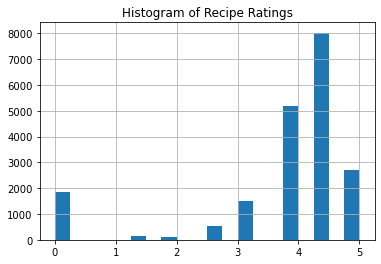

In [5]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

So a few things are shown in this histogram. Firstly there are sharp discontinutities. We don't have continuous data. No recipe has a 3.5 rating, for example. Also we see the anticipated increase at 0.

Let's try a naive approach again, this time using SVM Regressor. But first, we'll have to do a bit of data cleaning.

In [6]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

What we can see right away is that nutrition information is not available for all goods. Now this would be an interesting data point, but let's focus on ingredients and keywords right now. So we'll actually drop the whole columns for calories, protein, fat, and sodium. We'll come back to nutrition information later.

In [7]:
from sklearn.svm import SVR
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1).sample(frac=0.3, replace=True, random_state=1)
Y = raw_data.rating.sample(frac=0.3, replace=True, random_state=1)
svr.fit(X,Y)

SVR()

__Note that this actually takes quite a while to run, compared to some of the models we've done before. Be patient.__ It's because of the number of features we have.

Let's see what a scatter plot looks like, comparing actuals to predicted.

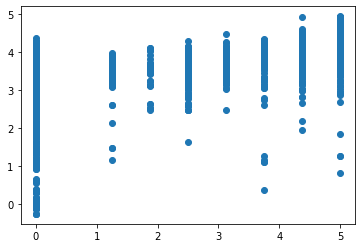

In [8]:
plt.scatter(Y, svr.predict(X))

Now that is a pretty useless visualization. This is because of the discontinuous nature of our outcome variable. There's too much data for us to really see what's going on here. If you wanted to look at it you could create histograms, here we'll move on to the scores of both our full fit model and with cross validation. Again if you choose to run it again it will take some time, so you probably shouldn't.

In [9]:
svr.score(X, Y)

0.40998459138007937

In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

array([0.19563385, 0.14683481, 0.15013401, 0.13597791, 0.16082192])

Oh dear, so this did seem not to work very well. In fact it is remarkably poor. Now there are many things that we could do here. 

Firstly the overfit is a problem, even though it was poor in the first place. We could go back and clean up our feature set. There might be some gains to be made by getting rid of the noise.

We could also see how removing the nulls but including dietary information performs. Though its a slight change to the question we could still possibly get some improvements there.

Lastly, we could take our regression problem and turn it into a classifier. With this number of features and a discontinuous outcome, we might have better luck thinking of this as a classification problem. We could make it simpler still by instead of classifying on each possible value, group reviews to some decided high and low values.

__And that is your challenge.__

Transform this regression problem into a binary classifier and clean up the feature set. You can choose whether or not to include nutritional information, but try to cut your feature set down to the 30 most valuable features.

Good luck!

## Refine features, convert to binary classifer, run SVM

Remove excess noisy columns 

In [4]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [5]:
ratings_df = raw_data.copy()

In [6]:
ratings_df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anniversary,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona,artichoke,arugula,asian pear,asparagus,aspen,atlanta,australia,avocado,back to school,backyard bbq,bacon,bake,banana,barley,basil,bass,bastille day,bean,beef,beef rib,beef shank,beef tenderloin,beer,beet,bell pepper,berry,beverly hills,birthday,biscuit,bitters,blackberry,blender,blue cheese,blueberry,boil,bok choy,bon appétit,bon app��tit,boston,bourbon,braise,bran,brandy,bread,breadcrumbs,breakfast,brie,brine,brisket,broccoli,broccoli rabe,broil,brooklyn,brown rice,brownie,brunch,brussel sprout,buffalo,buffet,bulgaria,bulgur,burrito,butter,buttermilk,butternut squash,butterscotch/caramel,cabbage,cake,california,calvados,cambridge,campari,camping,canada,candy,candy thermometer,cantaloupe,capers,caraway,cardamom,carrot,cashew,casserole/gratin,cauliflower,caviar,celery,chambord,champagne,chard,chartreuse,cheddar,cheese,cherry,chestnut,chicago,chicken,chickpea,chile,chile pepper,chili,chill,chive,chocolate,christmas,christmas eve,cilantro,cinco de mayo,cinnamon,citrus,clam,clove,cobbler/crumble,cocktail,cocktail party,coconut,cod,coffee,coffee grinder,cognac/armagnac,collard greens,colorado,columbus,condiment,condiment/spread,connecticut,cook like a diner,cookbook critic,cookie,cookies,coriander,corn,cornmeal,costa mesa,cottage cheese,couscous,crab,cranberry,cranberry sauce,cream cheese,créme de cacao,crêpe,cr��me de cacao,cuba,cucumber,cumin,cupcake,currant,curry,custard,dairy,dairy free,dallas,date,deep-fry,denver,dessert,digestif,dill,dinner,dip,diwali,dominican republic,dorie greenspan,double boiler,dried fruit,drink,drinks,duck,easter,eau de vie,edible gift,egg,egg nog,eggplant,egypt,emeril lagasse,endive,engagement party,england,entertaining,epi + ushg,epi loves the microwave,escarole,fall,family reunion,fat free,father's day,fennel,feta,fig,fish,flaming hot summer,flat bread,florida,fontina,food processor,fortified wine,fourth of july,france,frangelico,frankenrecipe,freeze/chill,freezer food,friendsgiving,frittata,fritter,frozen dessert,fruit,fruit juice,fry,game,garlic,georgia,germany,gin,ginger,goat cheese,goose,gouda,gourmet,graduation,grains,grand marnier,granola,grape,grapefruit,grappa,green bean,green onion/scallion,grill,grill/barbecue,ground beef,ground lamb,guam,guava,haiti,halibut,halloween,ham,hamburger,hanukkah,harpercollins,hawaii,hazelnut,healdsburg,healthy,herb,high fiber,hollywood,hominy/cornmeal/masa,honey,honeydew,hors d'oeuvre,horseradish,hot drink,hot pepper,house & garden,house cocktail,houston,hummus,ice cream,ice cream machine,iced coffee,iced tea,idaho,illinois,indiana,iowa,ireland,israel,italy,jalapeño,jam or jelly,jamaica,japan,jerusalem artichoke,juicer,jícama,kahlúa,kale,kansas,kansas city,kentucky,kentucky derby,kid-friendly,kidney friendly,kirsch,kitchen olympics,kiwi,kosher,kosher for passover,kumquat,kwanzaa,labor day,lamb,lamb chop,lamb shank,lancaster,las vegas,lasagna,leafy green,leek,legume,lemon,lemon juice,lemongrass,lentil,lettuce,lima bean,lime,lime juice,lingonberry,liqueur,lobster,london,long beach,los angeles,louisiana,louisville,low cal,low carb,low cholesterol,low fat,low sodium,low sugar,low/no sugar,lunar new year,lunch,lychee,macadamia nut,macaroni and cheese,maine,mandoline,mango,maple syrup,mardi gras,margarita,marinade,marinate,marsala,marscarpone,marshmallow,martini,maryland,massachusetts,mayonnaise,meat,meatball,meatloaf,melon,mexico,mezcal,miami,michigan,microwave,midori,milk/cream,minneapolis,minnesota,mint,mississippi,missouri,mixer,molasses,monterey jack,mortar and pestle,mother's day,mozzarella,muffin,mushroom,mussel,mustard,mustard greens,nancy silverton,nebraska,nectarine,new hampshire,new jersey,new mexico,new orleans,new year's day,new year's eve,new york,"no meat, no problem",no sugar a

In [12]:
ratings_df.describe(include = 'all')

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anniversary,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona,artichoke,arugula,asian pear,asparagus,aspen,atlanta,australia,avocado,back to school,backyard bbq,bacon,bake,banana,barley,basil,bass,bastille day,bean,beef,beef rib,beef shank,beef tenderloin,beer,beet,bell pepper,berry,beverly hills,birthday,biscuit,bitters,blackberry,blender,blue cheese,blueberry,boil,bok choy,bon appétit,bon app��tit,boston,bourbon,braise,bran,brandy,bread,breadcrumbs,breakfast,brie,brine,brisket,broccoli,broccoli rabe,broil,brooklyn,brown rice,brownie,brunch,brussel sprout,buffalo,buffet,bulgaria,bulgur,burrito,butter,buttermilk,butternut squash,butterscotch/caramel,cabbage,cake,california,calvados,cambridge,campari,camping,canada,candy,candy thermometer,cantaloupe,capers,caraway,cardamom,carrot,cashew,casserole/gratin,cauliflower,caviar,celery,chambord,champagne,chard,chartreuse,cheddar,cheese,cherry,chestnut,chicago,chicken,chickpea,chile,chile pepper,chili,chill,chive,chocolate,christmas,christmas eve,cilantro,cinco de mayo,cinnamon,citrus,clam,clove,cobbler/crumble,cocktail,cocktail party,coconut,cod,coffee,coffee grinder,cognac/armagnac,collard greens,colorado,columbus,condiment,condiment/spread,connecticut,cook like a diner,cookbook critic,cookie,cookies,coriander,corn,cornmeal,costa mesa,cottage cheese,couscous,crab,cranberry,cranberry sauce,cream cheese,créme de cacao,crêpe,cr��me de cacao,cuba,cucumber,cumin,cupcake,currant,curry,custard,dairy,dairy free,dallas,date,deep-fry,denver,dessert,digestif,dill,dinner,dip,diwali,dominican republic,dorie greenspan,double boiler,dried fruit,drink,drinks,duck,easter,eau de vie,edible gift,egg,egg nog,eggplant,egypt,emeril lagasse,endive,engagement party,england,entertaining,epi + ushg,epi loves the microwave,escarole,fall,family reunion,fat free,father's day,fennel,feta,fig,fish,flaming hot summer,flat bread,florida,fontina,food processor,fortified wine,fourth of july,france,frangelico,frankenrecipe,freeze/chill,freezer food,friendsgiving,frittata,fritter,frozen dessert,fruit,fruit juice,fry,game,garlic,georgia,germany,gin,ginger,goat cheese,goose,gouda,gourmet,graduation,grains,grand marnier,granola,grape,grapefruit,grappa,green bean,green onion/scallion,grill,grill/barbecue,ground beef,ground lamb,guam,guava,haiti,halibut,halloween,ham,hamburger,hanukkah,harpercollins,hawaii,hazelnut,healdsburg,healthy,herb,high fiber,hollywood,hominy/cornmeal/masa,honey,honeydew,hors d'oeuvre,horseradish,hot drink,hot pepper,house & garden,house cocktail,houston,hummus,ice cream,ice cream machine,iced coffee,iced tea,idaho,illinois,indiana,iowa,ireland,israel,italy,jalapeño,jam or jelly,jamaica,japan,jerusalem artichoke,juicer,jícama,kahlúa,kale,kansas,kansas city,kentucky,kentucky derby,kid-friendly,kidney friendly,kirsch,kitchen olympics,kiwi,kosher,kosher for passover,kumquat,kwanzaa,labor day,lamb,lamb chop,lamb shank,lancaster,las vegas,lasagna,leafy green,leek,legume,lemon,lemon juice,lemongrass,lentil,lettuce,lima bean,lime,lime juice,lingonberry,liqueur,lobster,london,long beach,los angeles,louisiana,louisville,low cal,low carb,low cholesterol,low fat,low sodium,low sugar,low/no sugar,lunar new year,lunch,lychee,macadamia nut,macaroni and cheese,maine,mandoline,mango,maple syrup,mardi gras,margarita,marinade,marinate,marsala,marscarpone,marshmallow,martini,maryland,massachusetts,mayonnaise,meat,meatball,meatloaf,melon,mexico,mezcal,miami,michigan,microwave,midori,milk/cream,minneapolis,minnesota,mint,mississippi,missouri,mixer,molasses,monterey jack,mortar and pestle,mother's day,mozzarella,muffin,mushroom,mussel,mustard,mustard greens,nancy silverton,nebraska,nectarine,new hampshire,new jersey,new mexico,new orleans,new year's day,new year's eve,new york,"no meat, no problem",no sugar a

In [54]:
# Count how many nulls there are per column
total_nulls = ratings_df.isna().sum()
total_nulls.sort_values(inplace=True, ascending = False)

# Observe the percentage of nulls in each column
percent_nulls = ratings_df.isna().sum()* 100 / len(ratings_df)
percent_nulls.sort_values(inplace=True, ascending = False)

print('total nulls per column')
print(total_nulls)
print('------------------------\npercent nulls per column')
print(percent_nulls)

total nulls per column
fat                         4183
protein                     4162
sodium                      4119
calories                    4117
turkey                         0
fourth of july                 0
fritter                        0
frittata                       0
friendsgiving                  0
freezer food                   0
freeze/chill                   0
frankenrecipe                  0
frangelico                     0
france                         0
fontina                        0
fortified wine                 0
food processor                 0
fruit                          0
florida                        0
flat bread                     0
flaming hot summer             0
fish                           0
fig                            0
feta                           0
frozen dessert                 0
fry                            0
fruit juice                    0
father's day                   0
grappa                         0
grapefruit          

In [7]:
ratings_df = ratings_df.drop(['title', 'calories', 'protein', 'fat', 'sodium'], 1)

In [56]:
percent_counts

alcoholic            4.164
almond               2.912
appetizer            6.842
apple                3.321
apricot              1.342
arugula              1.386
asparagus            1.032
avocado              1.361
back to school       1.007
backyard bbq         4.678
bacon                2.927
bake                22.008
basil                2.818
bean                 2.878
beef                 4.044
beet                 1.047
bell pepper          3.825
berry                2.319
blender              3.082
blue cheese          1.172
boil                 2.219
bon appétit         46.654
braise               1.646
brandy               1.346
bread                2.489
breakfast            3.551
broil                2.439
brunch               4.154
cabbage              1.531
cake                 3.591
carrot               3.496
celery               1.701
cheddar              1.282
cheese               6.757
cherry               1.217
chicken              6.703
chile pepper         1.182
c

In [8]:
ratings_df['is_beef'] = ratings_df['beef'] + ratings_df['beef rib'] + ratings_df['steak'] + ratings_df['beef shank'] + ratings_df['beef tenderloin']
ratings_df['is_lamb'] = ratings_df['lamb'] + ratings_df['lamb chop'] + ratings_df['lamb shank'] + ratings_df['rack of lamb']
ratings_df['is_pork'] = ratings_df['pork'] + ratings_df['pork chop'] + ratings_df['pork rib'] + ratings_df['pork tenderloin']
ratings_df['is_fast'] = ratings_df['quick & easy'] + ratings_df['quick and healthy'] + ratings_df['22-minute meals'] + ratings_df['3-ingredient recipes']
ratings_df['is_bon_appetit'] = ratings_df['bon appétit'] + ratings_df['bon app��tit']
ratings_df['is_creme_de_cacao'] = ratings_df['créme de cacao'] + ratings_df['cr��me de cacao']
ratings_df['is_grilled'] = ratings_df['grill'] + ratings_df['grill/barbecue']

In [9]:
# Observe the percentage of 1s in each column
percent_counts = ratings_df.iloc[:, 1:].sum(axis=0)* 100 / len(ratings_df.iloc[:, 1:])
percent_counts.sort_values()

westwood                    0.005
germany                     0.005
windsor                     0.005
fritter                     0.005
frankenrecipe               0.005
beverly hills               0.005
kitchen olympics            0.005
las vegas                   0.005
london                      0.005
emeril lagasse              0.005
egypt                       0.005
quiche                      0.005
dorie greenspan             0.005
marinade                    0.005
sorbet                      0.005
providence                  0.005
burrito                     0.005
yonkers                     0.005
camping                     0.005
cr��me de cacao             0.005
crêpe                       0.005
mezcal                      0.005
costa mesa                  0.005
mississippi                 0.005
caviar                      0.005
nancy silverton             0.005
pacific palisades           0.005
new hampshire               0.005
waffle                      0.005
bulgaria      

In [10]:
percent_counts = pd.DataFrame(percent_counts)

percent_counts.columns = ['percent_counts']

In [11]:
# make drop list
to_drop = percent_counts[percent_counts['percent_counts'] < 1].index

In [12]:
ratings_df_2 = ratings_df.copy()

In [13]:
# Drop features 
ratings_df_2 = ratings_df_2.drop(to_drop, axis=1)

In [104]:
ratings_df_2.head()

,rating,alcoholic,almond,appetizer,apple,apricot,arugula,asparagus,avocado,back to school,backyard bbq,bacon,bake,basil,bean,beef,beet,bell pepper,berry,blender,blue cheese,boil,bon appétit,braise,brandy,bread,breakfast,broil,brunch,cabbage,cake,carrot,celery,cheddar,cheese,cherry,chicken,chile pepper,chill,chive,chocolate,christmas,christmas eve,cilantro,cinnamon,citrus,cocktail,cocktail party,coconut,condiment/spread,cookies,corn,cornmeal,cranberry,cream cheese,cucumber,curry,dairy,dairy free,dessert,dill,dinner,dried fruit,drink,easter,egg,eggplant,fall,family reunion,fat free,father's day,fennel,feta,fish,food processor,fourth of july,freeze/chill,frozen dessert,fruit,fruit juice,fry,garlic,gin,ginger,goat cheese,gourmet,green bean,grill,grill/barbecue,ham,healthy,herb,high fiber,honey,hot pepper,house & garden,jalapeño,kid-friendly,kidney friendly,kosher,lamb,leafy green,leek,lemon,lettuce,lime,liqueur,low cal,low carb,low cholesterol,low fat,low sodium,low/no sugar,lunch,mango,marinate,mayonnaise,meat,milk/cream,mint,mixer,mushroom,mustard,no sugar added,no-cook,non-alcoholic,nut,olive,onion,orange,paleo,pan-fry,parmesan,parsley,party,pasta,pea,peanut free,pear,pecan,pepper,pescatarian,picnic,pine nut,pineapple,pork,potato,potluck,poultry,quick & easy,radish,raisin,raspberry,red wine,rice,roast,rosemary,rum,salad,salmon,sandwich,sauce,sausage,sauté,seafood,self,shallot,shellfish,shower,shrimp,side,simmer,soup/stew,sour cream,soy free,soy sauce,spice,spinach,spirit,spring,steak,steam,stir-fry,strawberry,sugar conscious,summer,super bowl,sweet potato/yam,tarragon,thanksgiving,thyme,tomato,tree nut free,valentine's day,vanilla,vegan,vegetable,vegetarian,vinegar,walnut,wheat/gluten-free,white wine,winter,yogurt,zucchini,turkey,is_beef,is_lamb,is_pork,is_fast,is_bon_appetit,is_grilled
0,2.500,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
1,4.375,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0

In [14]:
# Observe the percentage of 1s in each column
percent_counts = ratings_df_2.iloc[:, 1:].sum(axis=0)* 100 / len(ratings_df_2.iloc[:, 1:])
percent_counts

alcoholic            4.164
almond               2.912
appetizer            6.842
apple                3.321
apricot              1.342
arugula              1.386
asparagus            1.032
avocado              1.361
back to school       1.007
backyard bbq         4.678
bacon                2.927
bake                22.008
basil                2.818
bean                 2.878
beef                 4.044
beet                 1.047
bell pepper          3.825
berry                2.319
blender              3.082
blue cheese          1.172
boil                 2.219
bon appétit         46.654
braise               1.646
brandy               1.346
bread                2.489
breakfast            3.551
broil                2.439
brunch               4.154
cabbage              1.531
cake                 3.591
carrot               3.496
celery               1.701
cheddar              1.282
cheese               6.757
cherry               1.217
chicken              6.703
chile pepper         1.182
c

In [15]:
drop_list = ['beef', 'steak', 'lamb', 'pork', 'quick & easy', 'bon appétit', 'grill', 'grill/barbecue']

In [16]:
ratings_df_2 = ratings_df_2.drop(drop_list, axis = 1)

In [17]:
# Comparing correlation strength with "SalePrice", sorted on correlation value.
# NOTE: None of the variables have a strong negative relationship with "SalePrice"
num_corr = abs(ratings_df_2[ratings_df_2.columns[0:]].corr()['rating'][:]).sort_values()
print(num_corr)

breakfast           0.000
cornmeal            0.000
chive               0.001
cookies             0.001
green bean          0.001
carrot              0.001
fry                 0.001
cheddar             0.002
leek                0.002
zucchini            0.002
boil                0.003
strawberry          0.003
coconut             0.004
tarragon            0.004
seafood             0.004
cherry              0.004
parsley             0.004
simmer              0.004
no-cook             0.004
pea                 0.004
cucumber            0.005
low sodium          0.005
vanilla             0.005
dill                0.005
paleo               0.005
beet                0.005
mango               0.005
mint                0.006
low/no sugar        0.006
stir-fry            0.006
self                0.006
walnut              0.007
apple               0.007
vinegar             0.007
almond              0.008
steam               0.008
sandwich            0.008
avocado             0.009
christmas ev

In [18]:
ratings_df_2['positive_reviews'] = ratings_df_2.rating.apply(lambda x: 1 if x >= 3.5 else 0)

In [19]:
spec_chars = ['.', '(', ')', '/', '__', '-', ' ']

# fewer required characters with for loop vs method chaining
for char in spec_chars:
    ratings_df_2.columns = ratings_df_2.columns.str.replace(char, '_')

In [20]:
spec_chars = ["'"]

# fewer required characters with for loop vs method chaining
for char in spec_chars:
    ratings_df_2.columns = ratings_df_2.columns.str.replace(char, '')

In [21]:
spec_chars = ["&"]

# fewer required characters with for loop vs method chaining
for char in spec_chars:
    ratings_df_2.columns = ratings_df_2.columns.str.replace(char, 'and')

In [23]:
# Observe the percentage of 1s in each column
percent_counts = ratings_df_2.iloc[:, 1:].sum(axis=0)* 100 / len(ratings_df_2.iloc[:, 1:])
percent_counts

alcoholic            4.164
almond               2.912
appetizer            6.842
apple                3.321
apricot              1.342
arugula              1.386
asparagus            1.032
avocado              1.361
back_to_school       1.007
backyard_bbq         4.678
bacon                2.927
bake                22.008
basil                2.818
bean                 2.878
beet                 1.047
bell_pepper          3.825
berry                2.319
blender              3.082
blue_cheese          1.172
boil                 2.219
braise               1.646
brandy               1.346
bread                2.489
breakfast            3.551
broil                2.439
brunch               4.154
cabbage              1.531
cake                 3.591
carrot               3.496
celery               1.701
cheddar              1.282
cheese               6.757
cherry               1.217
chicken              6.703
chile_pepper         1.182
chill                5.615
chive                1.252
c

In [24]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

def VRF(predict, data, y):
   
    scale = StandardScaler(with_std=False)
    df = pd.DataFrame(scale.fit_transform(data), columns= cols)
    features = "+".join(cols)
    df['positive_reviews'] = y.values

    # get y and X dataframes based on this regression:
    y, X = dmatrices(predict + ' ~' + features, data = df, return_type='dataframe')

   # Calculate VIF Factors
    # For each X, calculate VIF and save in dataframe
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns

    # Inspect VIF Factors
    display(vif.sort_values('VIF Factor'))
    return vif

# Remove the higest correlations and run a multiple regression
cols = ratings_df_2.columns
cols = cols.drop(['positive_reviews'])
vif = VRF('positive_reviews', ratings_df_2.loc[ratings_df_2.positive_reviews>0, cols], ratings_df_2.positive_reviews[ratings_df_2.positive_reviews>0])

,VIF Factor,features
0,1.000,Intercept
132,1.044,pea
174,1.045,steam
160,1.049,shallot
108,1.051,low_no_sugar
21,1.052,boil
186,1.052,valentines_day
85,1.055,green_bean
181,1.055,tarragon
127,1.057,pan_fry


In [25]:
# Remove one feature with VIF on Inf from the same category and run a multiple regression
cols = cols.drop(['peanut_free', 'drink', 'soy_free','pescatarian', 'kosher', 'dessert', 'vegetarian'])
cols_drop = ['peanut_free', 'drink', 'soy_free','pescatarian', 'kosher', 'dessert', 'vegetarian']
vif = VRF('positive_reviews', ratings_df_2.loc[ratings_df_2.positive_reviews>0, cols], ratings_df_2.positive_reviews[ratings_df_2.positive_reviews>0])

,VIF Factor,features
0,1.000,Intercept
168,1.043,steam
129,1.043,pea
155,1.048,shallot
21,1.050,boil
105,1.050,low_no_sugar
180,1.051,valentines_day
83,1.054,green_bean
175,1.055,tarragon
124,1.056,pan_fry


In [26]:
drop_list_2 = ['peanut_free', 'drink', 'soy_free', 'pescatarian', 'kosher', 'dessert', 'vegetarian']

In [63]:
ratings_df_3 = ratings_df_2.drop(drop_list_2, axis = 1).copy()

## PCA

In [64]:
# model feature list
feature_list = [col_name for col_name in ratings_df_3.columns.copy()
              if col_name not in ["rating", "positive_reviews"]]

In [65]:
x = ratings_df_3[feature_list]
y = ratings_df_3['positive_reviews']

In [66]:
hp_pca = PCA(n_components=10)

# preprocessing data by fitting everything into the same range
x_scaled = StandardScaler().fit_transform(x)

xreg = hp_pca.fit_transform(x_scaled)

principalDataframe = pd.DataFrame(data = xreg, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6', 'PC7', 'PC8', 'PC9', 'PC10'])

#principalDataframe = pd.concat([principalDataframe, merged_df_hp], axis=1)
hp_pca_df = pd.concat([principalDataframe, ratings_df_3], axis=1)

In [68]:
correlation_df_pc1 = abs(hp_pca_df.corr()['PC1'][:]).sort_values()
print(correlation_df_pc1)

PC5                 0.000
PC3                 0.000
PC4                 0.000
PC10                0.000
PC6                 0.000
PC8                 0.000
PC9                 0.000
PC7                 0.000
PC2                 0.000
white_wine          0.001
cheddar             0.004
blender             0.006
kid_friendly        0.007
yogurt              0.008
turkey              0.009
easter              0.009
ginger              0.010
low_sodium          0.011
back_to_school      0.014
mango               0.014
blue_cheese         0.020
cornmeal            0.022
condiment_spread    0.022
red_wine            0.023
citrus              0.026
ham                 0.027
pine_nut            0.027
super_bowl          0.027
fall                0.027
mint                0.029
pan_fry             0.032
rosemary            0.034
brunch              0.034
is_lamb             0.034
thyme               0.036
curry               0.036
fourth_of_july      0.036
spice               0.037
cheese      

In [69]:
lower_corr_df = pd.DataFrame(correlation_df_pc1)

lower_corr_df.columns = ['correlation_df_pc1']

# correlation df
#lower_corr_df =lower_corr_df.select_dtypes(exclude = 'uint8').copy()

lower_corr_df = lower_corr_df.drop(['positive_reviews'])

In [83]:
to_drop_corr = lower_corr_df[lower_corr_df['correlation_df_pc1'] < 0.25].index
print(to_drop_corr)

Index(['PC5', 'PC3', 'PC4', 'PC10', 'PC6', 'PC8', 'PC9', 'PC7', 'PC2',
       'white_wine',
       ...
       'milk_cream', 'fruit', 'fruit_juice', 'appetizer', 'rum', 'high_fiber',
       'vegetable', 'low_cal', 'is_fast', 'liqueur'],
      dtype='object', length=184)


In [90]:
hp_pca_df_2 = hp_pca_df.drop(to_drop_corr, axis = 1)

In [91]:
hp_pca_df_2 = hp_pca_df_2.drop(['PC1', 'cocktail_party'], axis = 1)

In [92]:
hp_pca_df_2.shape

(20052, 22)

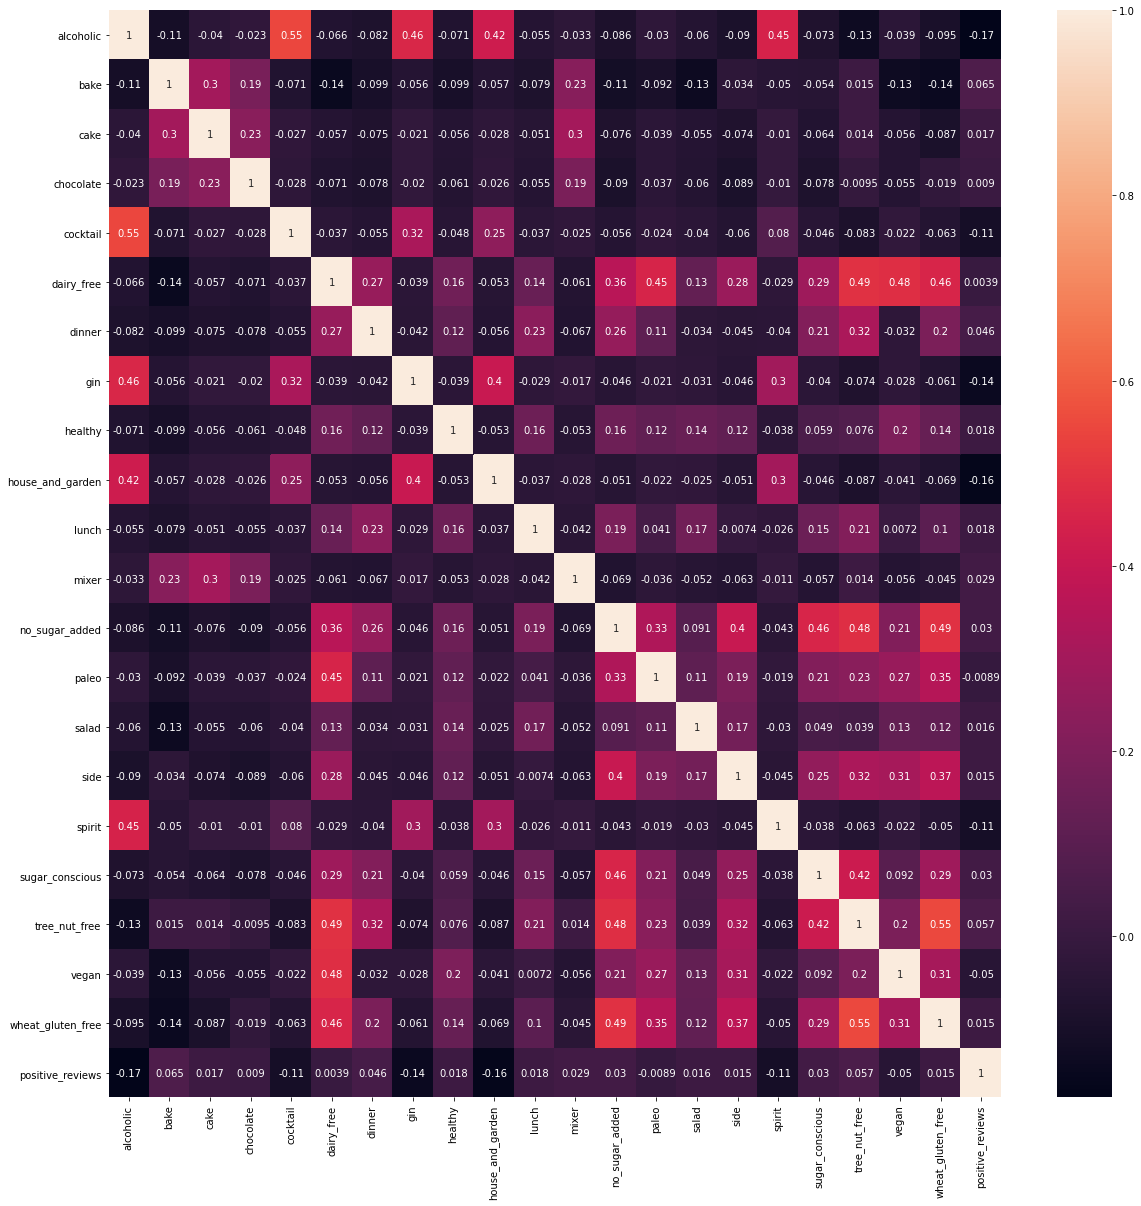

In [93]:
# See the correlation heatmap of the features
plt.figure(figsize=(20,20))
sns.heatmap(hp_pca_df_2.corr(),annot=True)

## Rerun SVM

In [94]:
# model feature list
feature_list_2 = [col_name for col_name in hp_pca_df_2.columns.copy()
              if col_name not in ["rating", "positive_reviews"]]

In [95]:
# Instantiate our model and fit the data.
X = hp_pca_df_2[feature_list_2]
Y = hp_pca_df_2['positive_reviews']
svm = SVC(kernel = 'linear')
svm.fit(X, Y)

SVC(kernel='linear')

In [96]:
svm.score(X,Y)

0.7998204667863554

In [97]:
cross_val_score(svm, X, Y, cv=5)

array([0.79705809, 0.80029918, 0.80049875, 0.8       , 0.80124688])

There appears to be a bias towards several related topics like alcoholic beverages, mixers, and food types. There was an early sign this could be an issue with the variations of meats (lamb, beef, etc). There was an attempt to limit that by combining the columns. It would appear that effort would need to be more widely applied to cut down on colinear/multilinear relationships between the features. <br>

Not to mention that people tend trust high ratings over others...success breeds success. Might be worth putting a weight factor on rating values to try and normalize the ranks. 